In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import seaborn as sns; sns.set()
import math 

In [2]:
df = pd.read_csv(r'C:\Users\harr1\Downloads\V0_BENT_LPI.csv')
print (df.head())

   OBJECTID  ROUNDID MISSIONID          REGION_NAME ISLAND  SITEVISITID  \
0     82196       53   OES0512  Mariana Archipelago   Guam          740   
1     82195       53   OES0512  Mariana Archipelago   Guam          740   
2     82194       53   OES0512  Mariana Archipelago   Guam          740   
3     82193       53   OES0512  Mariana Archipelago   Guam          740   
4     82192       53   OES0512  Mariana Archipelago   Guam          740   

     SITE  LATITUDE  LONGITUDE REEF_ZONE  ...   TRANNUM  LPI_SEG  BENTHICCODE  \
0  GUA-01  13.43005  144.63748  Forereef  ...         1      NDR         PAVE   
1  GUA-01  13.43005  144.63748  Forereef  ...         1      NDR         MOSP   
2  GUA-01  13.43005  144.63748  Forereef  ...         1      NDR         MALG   
3  GUA-01  13.43005  144.63748  Forereef  ...         1      NDR         ASSP   
4  GUA-01  13.43005  144.63748  Forereef  ...         1      NDR         ACSP   

        FAMILY       GENUS  CATEGORY_GENUS    BENTHICNAME  BEN

C:\Users\harr1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:


df = df.drop('MINDEPTH', axis=1)
df = df.drop('MAXDEPTH', axis=1)
df = df.drop('CALIBRATION', axis = 1)
df = df.drop('MIN_Z_M', axis = 1)
df = df.drop('MAX_Z_M', axis = 1)
df = df.drop('OBJECTID', axis = 1)
df = df.drop('ROUNDID', axis = 1)
df = df.drop('TRANNUM', axis = 1)
df = df.drop('LPI_SEG', axis = 1)
df = df.drop('LPITRANSECTRUN', axis = 1)
df = df[df['BENTHICCATEGORY'] == 'CORL']
df= df.dropna()
print (df.head(20))

   MISSIONID          REGION_NAME ISLAND  SITEVISITID    SITE  LATITUDE  \
1    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
3    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
4    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
5    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
8    OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
10   OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
11   OES0512  Mariana Archipelago   Guam          740  GUA-01  13.43005   
13   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
18   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
20   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
23   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
24   OES0512  Mariana Archipelago   Guam          749  GUA-02  13.30528   
25   OES0512  Mariana Arc

C:\Users\harr1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\harr1\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\harr1\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\harr1\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\harr1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

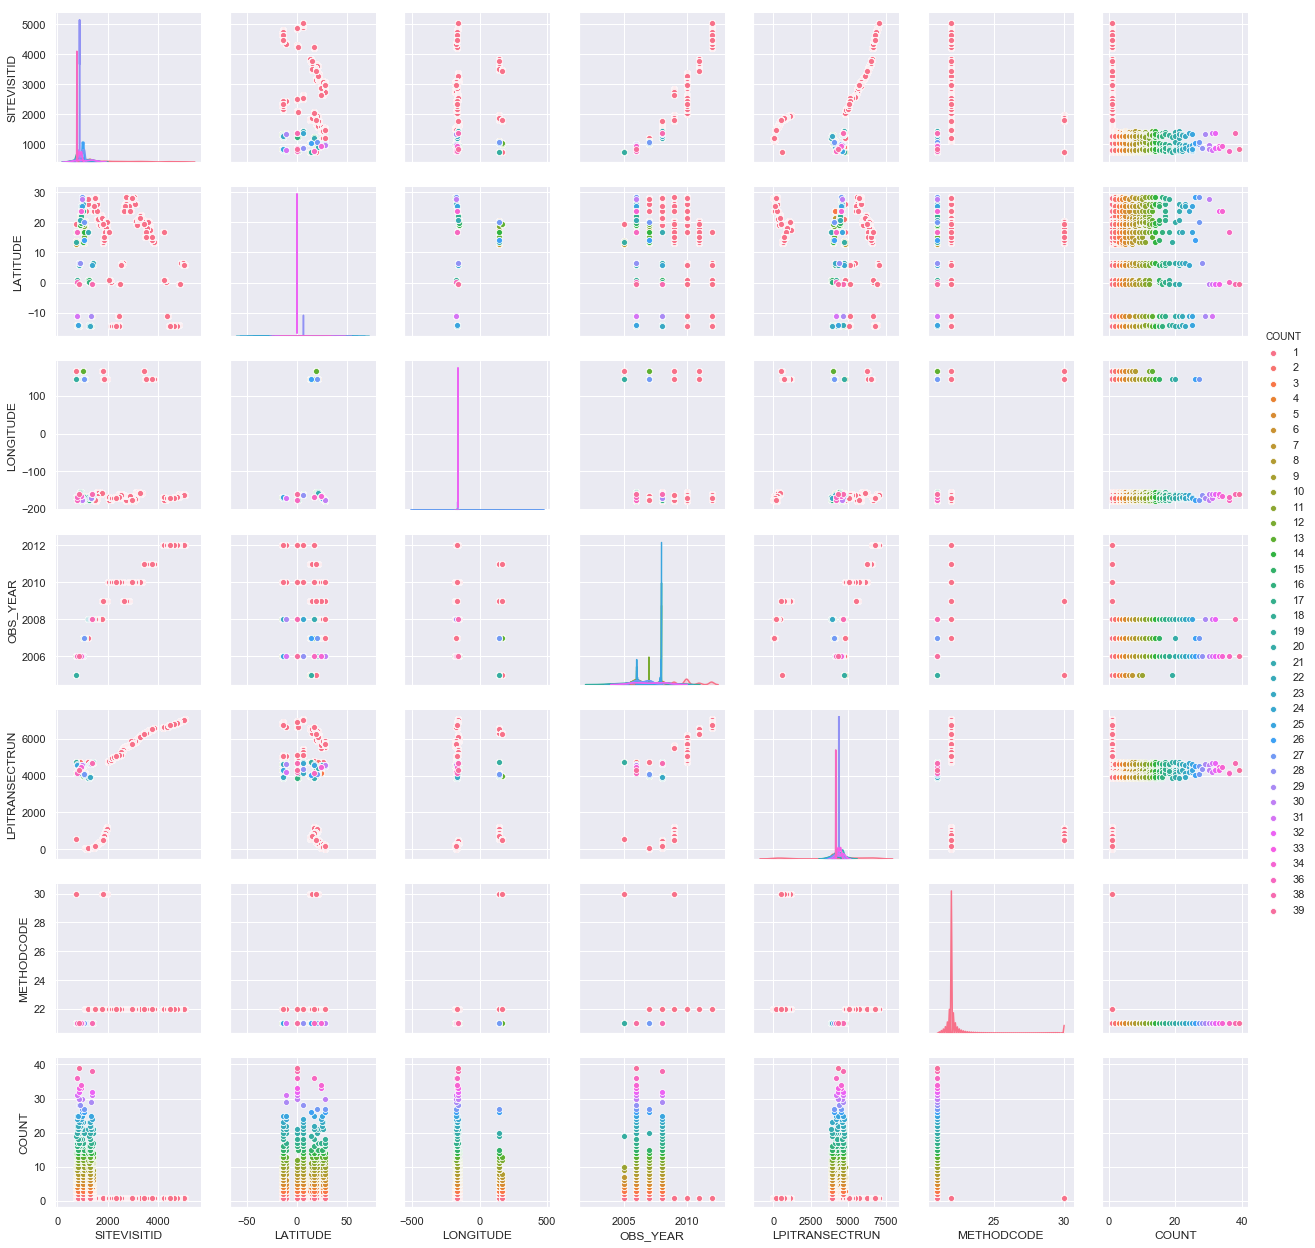

In [245]:
sns.pairplot(df, hue='COUNT');

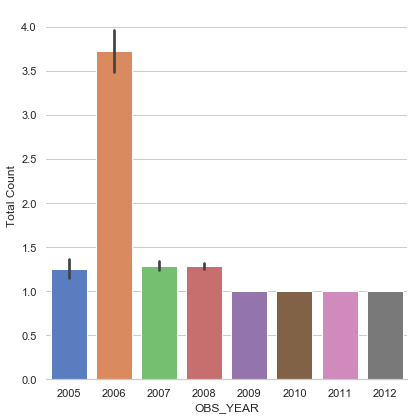

In [267]:

sns.set(style="whitegrid")



# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="OBS_YEAR", y="COUNT", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Count")

In [4]:
#convert date from dd-ABREV-yyyy to yyyymmdd

from datetime import datetime

df['Date']= [datetime.strptime(x, '%d-%b-%y').strftime('%Y-%m-%d') for x in df['DATE_']]

In [335]:
print(df.dtypes)

MISSIONID           object
REGION_NAME         object
ISLAND              object
SITEVISITID          int64
SITE                object
LATITUDE           float64
LONGITUDE          float64
REEF_ZONE           object
DEPTH_BIN           object
DATE_               object
OBS_YEAR             int64
DIVER               object
METHODCODE           int64
BENTHICCODE         object
FAMILY              object
GENUS               object
CATEGORY_GENUS      object
BENTHICNAME         object
BENTHICCATEGORY     object
COMMON_NAME         object
COUNT                int64
Date                object
Region_buoys        object
dtype: object


In [336]:
df = df[df['Date']<='2008-12-31']

In [337]:
print (df.describe())

        SITEVISITID      LATITUDE     LONGITUDE      OBS_YEAR    METHODCODE  \
count  13311.000000  13311.000000  13311.000000  13311.000000  13311.000000   
mean    1344.324544     17.905677   -136.965282   2007.408084     21.998497   
std      301.010845     12.183251     92.456541      0.856376      1.569334   
min      740.000000    -14.559317   -178.378433   2005.000000     21.000000   
25%     1124.000000     19.267200   -170.692880   2007.000000     21.000000   
50%     1445.000000     21.183650   -166.235023   2008.000000     22.000000   
75%     1603.000000     23.882214   -156.657908   2008.000000     22.000000   
max     1774.000000     28.453650    166.657360   2008.000000     30.000000   

              COUNT  
count  13311.000000  
mean       1.605063  
std        2.454344  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max       39.000000  


In [338]:
df_grouped= df.groupby(['Date'])

df_tot = df_grouped.sum()

print (df_tot)

            SITEVISITID      LATITUDE     LONGITUDE  OBS_YEAR  METHODCODE  \
Date                                                                        
2005-10-03         8144    147.904630   1591.236440     22055         231   
2005-10-04        11883    217.543500   2317.808830     32080         336   
2005-10-05         5208     95.215890   1014.491800     14035         147   
2005-10-07         7474    128.122000   1444.244580     20050         210   
2005-10-08         8994    159.281160   1736.135340     24060         252   
2005-10-18        57906   1485.233980  12829.164320    154385        2310   
2005-10-19        56623   1447.581740  12494.876610    150375        2250   
2005-10-20        83349   2123.904420  18327.347550    220550        3300   
2005-10-21        11400    289.651950   2499.057450     30075         450   
2005-10-22       135647   3437.044760  29661.847620    356890        5340   
2006-01-18        26011    569.640550  -5763.281660     68204         714   

In [339]:

print (df.groupby(['Date']))



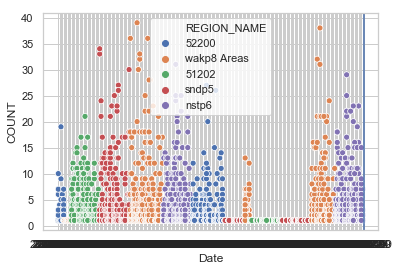

In [340]:

ax = sns.scatterplot(x='Date', y='COUNT', hue='REGION_NAME', data=df)
plt.axvline('2009-09-09')

                        
plt.show()

#WHY DOES THIS NOT WORK WHEN I CHANGE DATA=DF TO DATA=DF_GROUPED. SAYS IT CAN'T INTERPRET 'Date'

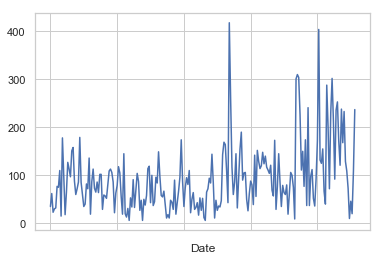

In [344]:
df.groupby(['Date'])['COUNT'].sum().plot()
plt.show()

In [275]:
#Get dummies for Acroporidae and REGION_NAME
features = pd.get_dummies(df['FAMILY'])
df['Acro_fam']=np.where((df['FAMILY'].isin(['Acroporidae'])), 1,0)
df['Archipelago']=np.where((df['REGION_NAME'].isin(['Mariana Archipelago'])), 1,0)
df['Remote'] = np.where((df['REGION_NAME'].isin(['Pacific Remote Island Areas'])), 1, 0)
df['Main HI'] = np.where((df['REGION_NAME'].isin(['Main Hawaiian Islands'])),1,0)
df['NW HI'] = np.where((df['REGION_NAME'].isin(['Northwestern Hawaiian Islands'])), 1, 0)
df['Samoa']=np.where((df['REGION_NAME'].isin(['American Samoa'])), 1,0)


In [209]:
print ("# of families:", df['FAMILY'].nunique())
print ("Families:", df['FAMILY'].unique())
print ("Region names:", df['REGION_NAME'].unique())
print ("Benthic categories:", df['BENTHICCATEGORY'].nunique())

# of families: 17
Families: ['Acroporidae' 'Pocilloporidae' 'Poritidae' 'Faviidae' 'Mussidae'
 'Fungiidae' 'Agariciidae' 'Milleporidae' 'Siderastreidae' 'Merulinidae'
 'Stylasteridae' 'Dendrophylliidae' 'Oculinidae' 'Helioporidae'
 'Pectiniidae' 'Caryophylliidae' 'Astrocoeniidae']
Region names: ['Mariana Archipelago' 'Pacific Remote Island Areas'
 'Main Hawaiian Islands' 'Northwestern Hawaiian Islands' 'American Samoa']
Benthic categories: 1


AxesSubplot(0.125,0.125;0.775x0.755)


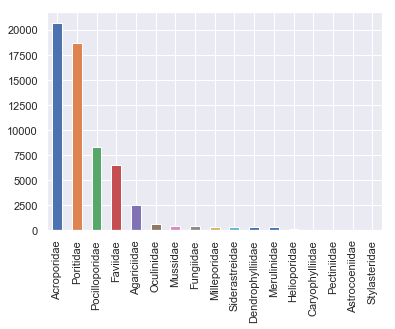

In [211]:
print (df['FAMILY'].value_counts().head(20).plot(kind = 'bar'))

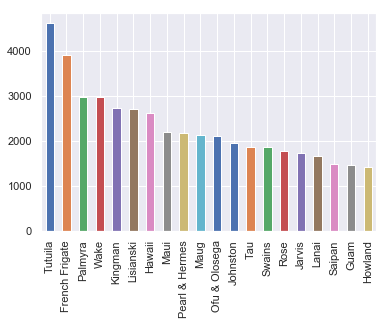

Number of Islands: 43


In [158]:
df['ISLAND'].value_counts().head(20).plot(kind='bar')
plt.show()
print ("Number of Islands:", df['ISLAND'].nunique())

(array([  511.,  1740.,  2866.,  8194.,  9630., 21072., 15463.]),
 array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.]),
 <a list of 7 Patch objects>)

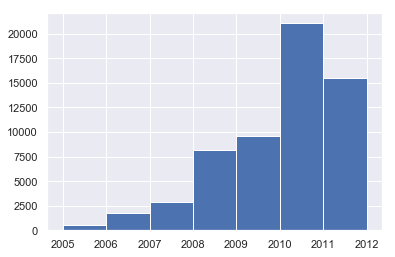

In [123]:
plt.hist(df.OBS_YEAR, bins = 7)

In [795]:
#How many unique dates are there per year?

In [42]:
df_agg = df.groupby(['OBS_YEAR','DATE_', 'ISLAND', 'REGION_NAME', 'REEF_ZONE', 'LATITUDE', 'LONGITUDE', 'COUNT'])['COUNT'].sum()


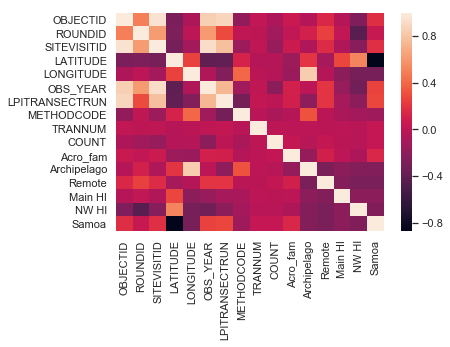

In [124]:
sns.heatmap(df.corr())

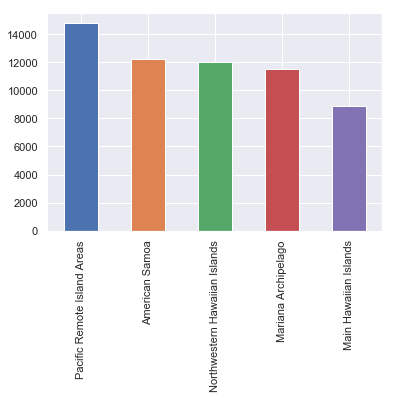

In [122]:

df['REGION_NAME'].value_counts().head(20).plot(kind='bar')


In [776]:
print (type('DATE_'))
print (df['DATE_'])

<class 'str'>
1         03-OCT-05
3         03-OCT-05
4         03-OCT-05
8         03-OCT-05
10        03-OCT-05
13        08-OCT-05
23        08-OCT-05
25        08-OCT-05
29        08-OCT-05
31        08-OCT-05
49        04-OCT-05
68        05-OCT-05
79        04-OCT-05
83        04-OCT-05
84        04-OCT-05
89        04-OCT-05
92        04-OCT-05
93        04-OCT-05
98        03-OCT-05
142       18-OCT-05
146       18-OCT-05
158       18-OCT-05
160       18-OCT-05
161       18-OCT-05
165       18-OCT-05
166       18-OCT-05
167       18-OCT-05
170       18-OCT-05
173       18-OCT-05
221       18-OCT-05
            ...    
229098    03-APR-12
229101    03-APR-12
229102    03-APR-12
229103    03-APR-12
229104    03-APR-12
229105    03-APR-12
229113    03-APR-12
229114    03-APR-12
229122    03-APR-12
229124    03-APR-12
229125    03-APR-12
229126    03-APR-12
229127    03-APR-12
229129    03-APR-12
229137    03-APR-12
229139    03-APR-12
229140    03-APR-12
229142    03-APR-12
229143

In [5]:
df = pd.concat([df, df['ISLAND'].str.get_dummies(sep=',')], axis=1)

In [6]:
df = pd.concat([df, df['BENTHICCATEGORY'].str.get_dummies(sep=',')], axis=1)

In [7]:
df = pd.concat([df, df['REEF_ZONE'].str.get_dummies(sep=',')], axis=1)

In [8]:
df =pd.concat([df, df['REGION_NAME'].str.get_dummies(sep=',')], axis=1)

In [9]:
df['OBS_YEAR'] = pd.to_numeric(df.OBS_YEAR, errors='coerce')

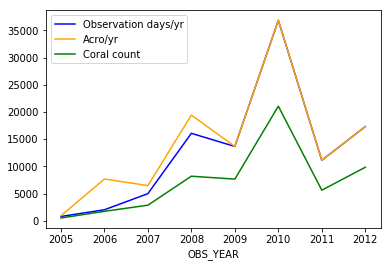

In [832]:
#Bias towards 2010 based on number of observations they made
df.groupby(['OBS_YEAR'])['Date'].count().plot(color = 'blue', label='Observation days/yr')
df.groupby(['OBS_YEAR'])['COUNT'].sum().plot(color = 'orange', label = 'Acro/yr')
df.groupby(['OBS_YEAR'])['Corl'].sum().plot(color = 'green', label = 'Coral count')
plt.legend(loc='upper left')
plt.show()


In [10]:
t = sns.regplot(
    'Date',
    'COUNT',
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
#df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
#df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

#t = sns.regplot(
 #   'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()



IndentationError: unexpected indent (<ipython-input-10-b0def37aa331>, line 22)

In [52]:
df['Obs/yr'] = df['Date'].groupby(df['OBS_YEAR']).transform('count')

In [59]:
#Without Date
data = df[['Date',
               'LATITUDE', 
           'LONGITUDE', 
 
           'OBS_YEAR', 
           'Acro_fam', 
           'Archipelago', 
           'Remote', 
           'Main HI', 
           'NW HI', 
           'Samoa', 
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef',
               'CORL', 'MALG', 'OCTO', 'INVT', 'ZOAN', 'CYAN', 'ANTH', 'CALG'
          ]]
target = df['COUNT']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [62]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log Regression: 0.9784370946822308
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BNB Regression: 0.9783722438391699


In [61]:
regr = linear_model.LinearRegression()

regr.fit(data, target)

print('Linear Regression:', regr.fit(x_train, y_train).score(x_test, y_test))
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


NameError: name 'x_train' is not defined

In [238]:
#with date
data = df_agg[['Date',
               'LATITUDE', 
           'LONGITUDE', 
           'MIN_Z_M', 
           'MAX_Z_M',  
           'Acro_fam', 
           'Archipelago', 
           'Remote', 
           'Main HI', 
           'NW HI', 
           'Samoa', 
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef'
          ]]
target = df['COUNT']

In [227]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log Regression: 0.9784370946822308
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BNB Regression: 0.9784046692607004


In [823]:
print ('Bernoulli prediction:', bnb.predict(data))
print('Log regr prediction:', lr.predict(data))

Bernoulli prediction: [1 1 1 ... 2 2 2]
Log regr prediction: [1 1 1 ... 1 1 1]


In [232]:
regr = linear_model.LinearRegression()
regr.fit(data, target)
print (regr.coef_)
print (regr.intercept_)
print (regr.fit(x_train, y_train).score(x_test, y_test))
print (regr.score(data, target))


[-4.75700570e-18 -9.38149260e-03 -1.36428941e-04  6.60230980e-04
  1.22403212e-03  2.66644457e-05  2.87801997e-05  1.29872205e-04
 -6.46794578e-05 -2.52401418e-04  1.58428471e-04  4.66964078e-06
 -5.27881480e-07 -2.90262737e-05 -2.39994957e-05 -8.47688091e-06
 -3.65530547e-07 -3.38406260e-06 -2.87767190e-06 -1.24135463e-05
 -5.99115675e-06 -1.04199602e-06 -6.12911710e-06 -8.52080312e-05
 -1.39560335e-05 -1.04179091e-05 -2.17376984e-05 -1.84917562e-05
 -1.88221864e-05 -7.18485450e-07 -8.30493172e-05  1.24447891e-05
  1.26960343e-05  3.16546892e-05  1.18731887e-05  3.91199434e-05
  5.11098335e-05  1.43068354e-05  4.26291262e-05  3.24796954e-05
  9.20937206e-06  5.98034421e-05  3.61547016e-06  6.37813527e-07
 -1.12364578e-06  4.59085686e-06  2.39100516e-06  3.99899722e-07
  8.43697699e-06  1.50777132e-06 -1.54218174e-06 -6.69258900e-07
  1.89229268e-06  4.50144038e-06  1.06971647e-04 -5.58796652e-05
 -3.63107801e-05 -1.47812016e-05]
7.21005238455894
0.06293768401932476
-1.4322059647640165

In [234]:
#without date (better)
regr = linear_model.LinearRegression()
regr.fit(data, target)
print (regr.coef_)
print (regr.intercept_)
print (regr.fit(x_train, y_train).score(x_test, y_test))
print (regr.score(data, target))

[-0.08560671  0.01100352 -0.01052316  0.00822912 -0.2001136   0.07229047
 -2.17903824 -0.07818174  1.50185166  1.81927296 -1.06390465 -0.44170703
  0.46770669 -2.44523677 -0.46209981 -0.25855553  4.09865962 -0.31256122
 -0.25367914 -0.36499888 -0.35289265 -0.19889313 -0.39312759 -0.43131148
  0.19426872 -0.23281511 -0.02788515 -0.02550562 -0.0144313   2.34579931
  0.01115358  0.08933844  0.11360899 -0.11949219  1.43384698  0.45743915
  0.39231365 -0.29284421 -0.27664542  0.09528908 -0.30816114 -0.28154295
 -0.05744819 -0.43229502 -0.22956707  0.02650992  0.0961467  -0.21786811
  0.09783289 -0.13927366 -0.40940625 -0.38891039 -0.19597331 -0.35478541
  0.05932014  0.05302321 -0.17020601  0.05786266]
405.4158588690983
0.06293768401932476
0.06930618681123257


In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=5)

array([0.12509708, 0.00919349, 0.        , 0.        , 0.        ])

In [818]:
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(x_train, y_train)
print (ridgeregr.fit(x_train, y_train).score(x_test, y_test))
print (cross_val_score(ridgeregr, data, target, cv = 5))



C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.547225e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.547225e-41
  overwrite_a=True).T


0.06430031203063868


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.232563e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.190856e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.252104e-41
  overwrite_a=True).T
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.257281e-41
  overwrite_a=True).T


[0.04149344 0.00791041 0.         0.         0.        ]


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.303415e-41
  overwrite_a=True).T


In [235]:
#Without date (worse)
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(x_train, y_train)
print (ridgeregr.fit(x_train, y_train).score(x_test, y_test))
print (cross_val_score(ridgeregr, data, target, cv = 5))


0.0073739885150989615
[-0.02699628 -0.0102408   0.          0.          0.        ]


In [819]:
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB()

MNB.fit(x_train,y_train).score(x_test, y_test)

ValueError: Input X must be non-negative

## Seems like Log and BNB regressions perform really well and linear regression and ridge regressions consistently perform poorly.

In [327]:
from ndbc import Station
from datetime import datetime

In [183]:
Buoys = {'Guam': 52202, 'Santa Rosa': 46069, 'Wake': WAKP8, 'Hawaii': 51206, 'Kauai': 51208, 'Kaula': 51208, 'Lanai': 51213,
         'Lehua': 51208, 'Maui':51205, 'Molokai': 51026, 'Niihau':51208, 'Oahu': 51202, 'French Frigate': 'sndp5',  
         'Kure': 'sndp5', 'Laysan': 'sndp5', 'Lisianski': 'sndp5', 'Maro': 'sndp5', 'Midway': 'sndp5', 'Necker': 'sndp5',
         'Pearl & Hermes': 'sndp5', 'Baker': 51310 , 'Howland': 51310, 'Jarvis': 51023 
         'Johnston' 'Kingman' 'Palmyra' 'Ofu & Olosega': NSTP6  'Rose':'NSTP6', 'Swains': 'nstp6',
 'Tau': 'nstp6', 'Tutuila': 'nstp6', 'Agrihan': 91222 'Aguijan':52200 'Alamagan' 'Asuncion'
 'Farallon de Pajaros' 'Guguan' 'Maug' 'Pagan' 'Rota': 52200, 'Saipan': 52200, 'Sarigan'
 'Tinian': 52200}


In [70]:
Region_dict = {'Pacific Remote Island' :'wakp8', 
               'Main Hawaiian Islands': 51202, 
               'Northwestern Hawaiian Islands':'sndp5', 
               'American Samoa': 'nstp6', 
               'Mariana Archipelago': 52200
              }


In [331]:
#Created new column of dictionary values

df['REGION_NAME'] = df.REGION_NAME.str.replace('Pacific Remote Island', 'wakp8').str.replace('Main Hawaiian Islands', '51202').str.replace('Northwestern Hawaiian Islands','sndp5').str.replace('American Samoa', 'nstp6').str.replace('Mariana Archipelago', '52200')

C:\Users\harr1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
#df_agg['BuoyNo'] = df_agg['ISLAND'].map(Buoys)
#print(df_agg.describe())

            OBJECTID        ROUNDID    SITEVISITID       LATITUDE  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean   127142.162155      47.270378    2720.260377      11.790533   
std     79747.018105      13.621488    1145.527734      14.384323   
min         7.000000       1.000000     740.000000     -14.559639   
25%     57216.000000      38.000000    1800.000000       0.814666   
50%    109236.000000      42.000000    2517.000000      18.096650   
75%    203166.000000      59.000000    3485.000000      21.889760   
max    257626.000000      68.000000    5058.000000      28.453650   

           LONGITUDE        MIN_Z_M        MAX_Z_M       OBS_YEAR  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean      -85.846523      10.871815      13.363007    2009.736442   
std       138.954342       4.046064       4.255341       1.554034   
min      -178.378433       1.000000       1.000000    2005.000000   
25%      -170.759450       9.0000

In [332]:
print (Station('wakp8').wtmp)

[]


In [333]:
list_of_stations =[]
for number in df['REGION_NAME']:
    list_of_stations.append(Station(number,datetime(2006,1,1), datetime(2012,5,19)))
    
    #not working because values are not separated from dict keys?

ValueError: Station wakp8 Areas not found in http://www.ndbc.noaa.gov/data/stations/station_table.txt

## Need a code to say for the date and the station, give the ave temp of the day or give the temp at noon or something.

dict_temp_series = {}
for x in df['Reg_buoy']:
    for y in df['DATE_']:
        dict_temp_series[station.name] = pd.Series(data=station.wtmp, index=station.time)

In [967]:
#list_of_stations = []
#for number in ['wakp8', 51202, 'sndp5', 'nstp6', 52200]:
#    list_of_stations.append(Station(number,datetime(2006,1,1), datetime(2012,5,19)))

In [946]:
list_of_station_series = []
for station in list_of_stations:
  list_of_station_series.append(pd.Series(data=station.wtmp, index=station.time, name=station.name))

In [947]:
dict_of_station_series = {}
for station in list_of_stations:
  dict_of_station_series[station.name] = pd.Series(data=station.wtmp, index=station.time)

In [948]:
df = pd.DataFrame(dict_of_station_series)
print(df)

                     1890000 - Wake Island  Mokapu Point, HI (098)  \
2006-01-01 00:00:00                   27.4                    25.8   
2006-01-01 00:06:00                   27.4                     NaN   
2006-01-01 00:12:00                   27.4                     NaN   
2006-01-01 00:18:00                   27.4                     NaN   
2006-01-01 00:24:00                   27.4                     NaN   
2006-01-01 00:30:00                   27.4                     NaN   
2006-01-01 00:36:00                   27.4                     NaN   
2006-01-01 00:42:00                   27.4                     NaN   
2006-01-01 00:48:00                   27.4                     NaN   
2006-01-01 00:54:00                   27.4                     NaN   
2006-01-01 01:00:00                   27.4                    25.8   
2006-01-01 01:06:00                   27.5                     NaN   
2006-01-01 01:12:00                   27.5                     NaN   
2006-01-01 01:18:00 

In [949]:
df.groupby(pd.Grouper(freq="M")).count()

,1890000 - Wake Island,"Mokapu Point, HI (098)","1619910 - Sand Island, Midway Islands","1770000 - Pago Pago, American Samoa","Ipan, Guam (121)"
2006-01-31,7070,741,7268,0,736
2006-02-28,6188,665,6234,0,662
2006-03-31,7296,739,7309,7325,731
2006-04-30,6652,700,6649,6670,700
2006-05-31,7303,744,7291,7337,744
2006-06-30,6978,714,6979,2009,713
2006-07-31,7173,618,7216,4172,742
2006-08-31,6988,688,6994,7006,740
2006-09-30,0,718,6959,6628,718
2006-10-31,6053,725,7092,7122,744
